## Final Project Submission

Please fill out:
* Student name: Gustavo Chavez
* Student pace: full time
* Scheduled project review date/time: Not yet scheduled
* Instructor name: Rafael Carrasco
* Blog post URL:


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_style('darkgrid')

In [58]:
path = os.getcwd()

In [59]:
os.chdir('../')

In [60]:
zipcode = [98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039]
pop_density = [4966, 6879, 3606, 6425, 2411, 662, 3800, 4441, 5573, 469, 5684, 7018, 9602, 6732, 141, 9905, 4423, 6279, 3591, 892, 4741, 8638, 6667, 2908, 469, 7953, 2215, 1717, 4323, 3580, 4604, 288, 3194, 10643, 1537, 4437, 1725, 13594, 7895, 3977, 2361, 4428, 2185,  7523, 334, 6841, 4714, 2024, 41, 15829, 785, 2989, 3794, 3341, 171, 2719, 3402, 10361, 52,3696, 4330, 236, 3569, 4877, 4161, 1231, 3062, 149, 4585, 2059] 
lists = list(zip(zipcode, pop_density)) 
pop_density_by_zip = pd.DataFrame(lists, columns = ['zipcode', 'pop_density']) 

df = pd.read_csv("data/king_county_data_clean.csv").drop('Unnamed: 0', axis=1)
df = pd.merge(left = df, right = pop_density_by_zip, on = 'zipcode', how='left')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,4966
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,6879
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,3606
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,6425
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2411


In [61]:
os.chdir(path)

In [62]:
amazon_coordinates = ( 47.623211, -122.337158)
microsoft_coordinates = (47.642440, -122.137030)
center = np.array(((amazon_coordinates[0]+microsoft_coordinates[0])/2 , (amazon_coordinates[1]+microsoft_coordinates[1])/2))
center

array([  47.6328255, -122.237094 ])

In [63]:
df['distance_frm_center'] = (df['lat']-center[0])**2 + (df['long']-center[1])**2

In [64]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density,distance_frm_center
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,4966,0.015189
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,6879,0.014483
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,3606,0.011057
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,6425,0.036856
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2411,0.037157


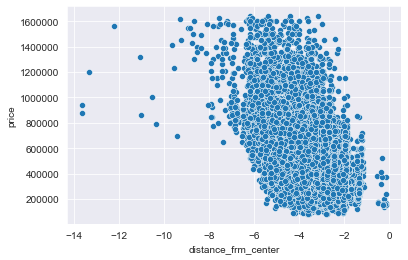

In [65]:
# we must log transform distance from center
sns.scatterplot(x = df['distance_frm_center'].map(lambda x: np.log(x)), y= df['price'], data=df)
df['log_dist_frm_center'] = df['distance_frm_center'].map(lambda x: np.log(x))

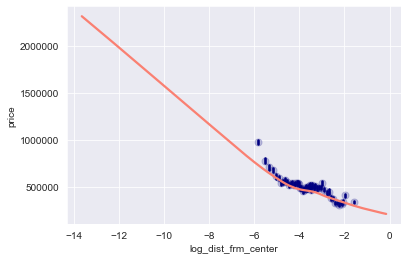

In [66]:
sns.regplot(x=df['log_dist_frm_center'], y=df['price'],x_bins=50,\
            data=df, lowess=True, line_kws = {'color':'salmon'}, scatter_kws={'color':'navy', 'alpha':0.2})

In [67]:
np.corrcoef(x= df['log_dist_frm_center'], y= df['price'])[0][1]

-0.45078120674419253

In [68]:
df['has_basement'] = np.where(df['sqft_basement']>0, 1, 0)
df['was_renovated'] = np.where(df['yr_renovated']>0, 1, 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density,distance_frm_center,log_dist_frm_center,has_basement,was_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,4966,0.015189,-4.187183,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,6879,0.014483,-4.234757,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,3606,0.011057,-4.504654,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,6425,0.036856,-3.300726,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,2411,0.037157,-3.292605,0,0


In [69]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density,distance_frm_center,log_dist_frm_center,has_basement,was_renovated
count,2.055700e+04,2.055700e+04,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,...,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000
mean,4.633913e+09,4.998646e+05,3.335506,2.062813,1995.651506,10656.213990,1.481515,0.003551,0.192976,3.416014,...,98078.997568,47.560005,-122.217227,1941.159751,10301.163448,4348.432553,0.044331,-3.644023,0.388724,0.032252
std,2.876734e+09,2.514426e+05,0.857104,0.701034,777.547402,13514.885796,0.537713,0.059487,0.684861,0.644790,...,53.571494,0.138923,0.139053,632.824347,15854.430531,2938.397356,0.051600,1.082123,0.487472,0.176672
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,2.000000,...,98001.000000,47.155900,-122.512000,399.000000,651.000000,41.000000,0.000001,-13.635286,0.000000,0.000000
25%,2.171400e+09,3.176250e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,...,98033.000000,47.469800,-122.331000,1470.000000,5036.000000,2215.000000,0.013194,-4.328009,0.000000,0.000000
50%,3.992700e+09,4.417500e+05,3.000000,2.250000,1870.000000,7490.000000,1.000000,0.000000,0.000000,3.000000,...,98070.000000,47.570700,-122.237000,1810.000000,7500.000000,4161.000000,0.025592,-3.665461,0.000000,0.000000
75%,7.375300e+09,6.200000e+05,4.000000,2.500000,2470.000000,10186.000000,2.000000,0.000000,0.000000,4.000000,...,98118.000000,47.679300,-122.129000,2300.000000,9790.000000,6425.000000,0.055940,-2.883482,1.000000,0.000000
max,9.900000e+09,1.640000e+06,6.000000,4.250000,4800.000000,138085.000000,3.000000,1.000000,4.000000,5.000000,...,98199.000000,47.777600,-121.315000,5790.000000,434728.000000,15829.000000,0.856685,-0.154685,1.000000,1.000000


0.353739532295033
correlation with each other:  0.28882801793251667


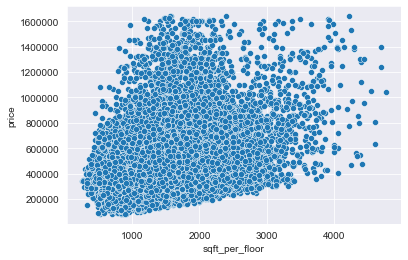

In [70]:
df['sqft_per_floor'] = df['sqft_living']/df['floors']
weird = df['sqft_per_floor']
sns.scatterplot(x=weird, y=df['price'])
print(np.corrcoef(x=weird, y=df['price'])[0][1])
print('correlation with each other: ', np.corrcoef(x=weird, y=df['grade'])[0][1])

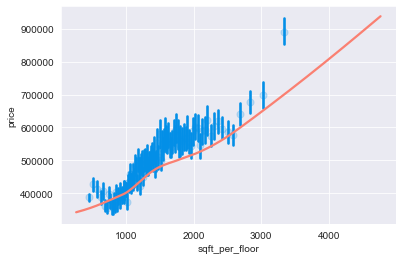

In [71]:
sns.regplot(x=weird, y=df['price'],x_bins=100,\
             lowess=True, line_kws = {'color':'salmon'},\
            scatter_kws={'color':'#038fe7', 'alpha':0.2})


0.4320125873106017   bed_bath_ratios_sum with price
0.6528275442824719  grade
correlation with each other:  0.3909830849146465


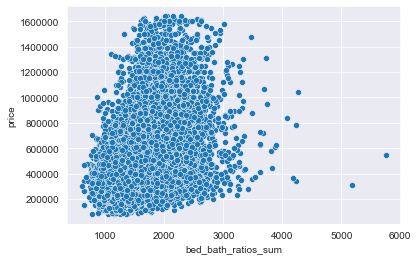

In [78]:
# 
df['bed_bath_ratios_sum'] = (df['sqft_living']/df['bathrooms']) + (df['sqft_living']/df['bedrooms'])
thing = df['bed_bath_ratios_sum']#.map(lambda x: np.log(x))
sns.scatterplot(x=thing, y=df['price'])


print(np.corrcoef(x=thing, y= df['price'])[0][1], "  bed_bath_ratios_sum with price")
print(np.corrcoef(x=df['grade'], y= df['price'])[0][1], ' grade')
print('correlation with each other: ', np.corrcoef(x=thing, y=df['grade'])[0][1])

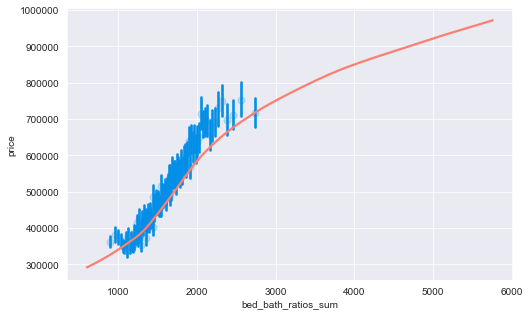

In [79]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['bed_bath_ratios_sum'], y=df['price'],x_bins=100,\
            data=df, lowess=True, line_kws = {'color':'salmon'},\
            scatter_kws={'color':'#038fe7', 'alpha':0.2})

## Creating a column that is a ratio of area per bathroom + area per bedroom still allows us to use those components while also removing multicollinearity with grade from our model, however sqft/floor also makes sense and is easier to comprehend

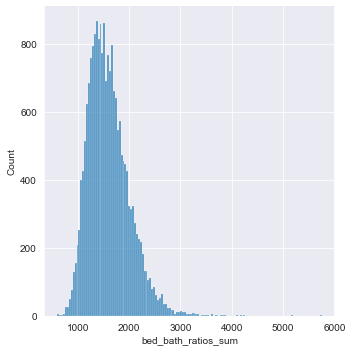

In [80]:
sns.displot(df['bed_bath_ratios_sum'])

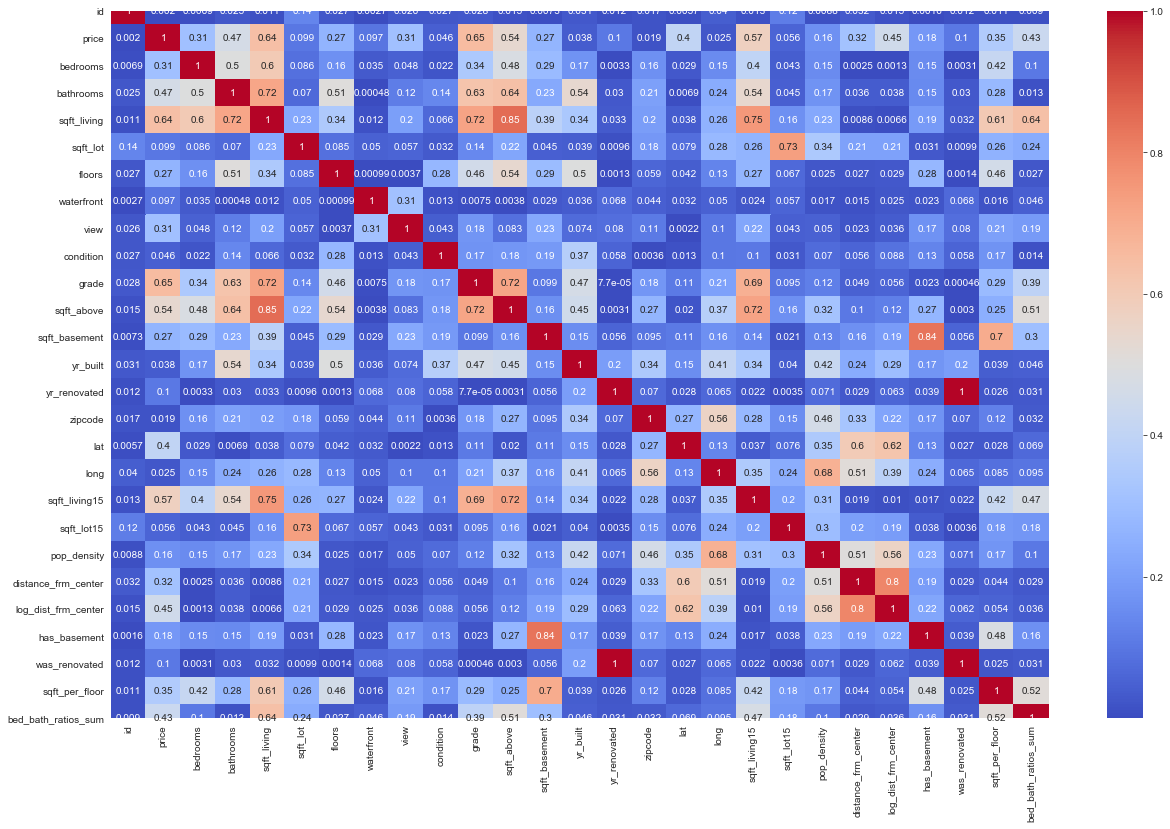

In [81]:
corr_df = abs(df.corr())
plt.figure(figsize=(21,13))
sns.heatmap(corr_df, cmap='coolwarm', annot=True)

In [82]:
options = [98155, 98177, 98133, 98155, 98125, 98117, 98103, 98115, 98105, 98102, 98112, 98109, 98107, 98119, 98199, 98122, 98144, 98134, 98108, 98118, 98168, 98106, 98126, 98136, 98116, 98146, 98178, 98121, 98101, 98154, 98104]  
seattle_proper = df[df['zipcode'].isin(options)] 
#seattle_proper

non_city_options = [98028, 98074, 98053, 98003, 98198, 98038, 98007, 98019, 98002, 98040, 98092, 98030, 98052, 98027, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98042, 98008, 98059, 98004, 98005, 98034, 98075, 98010, 98032, 98045, 98077, 98065, 98029, 98006, 98022, 98033, 98024, 98011, 98031, 98072, 98188, 98014, 98055, 98039]
burbs = df[df['zipcode'].isin(non_city_options)] 
#burbs

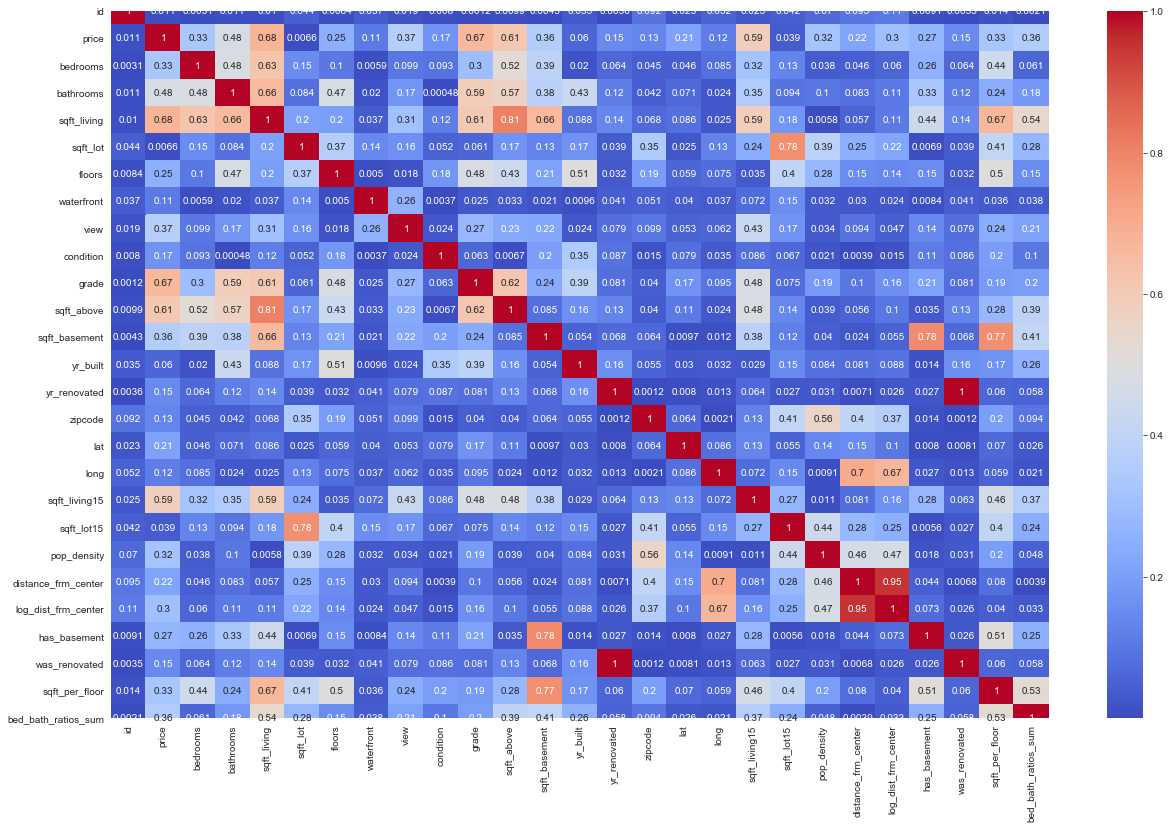

In [83]:
seattle_proper_corr_df = abs(seattle_proper.corr())
plt.figure(figsize=(21,13))
sns.heatmap(seattle_proper_corr_df, cmap='coolwarm', annot=True)

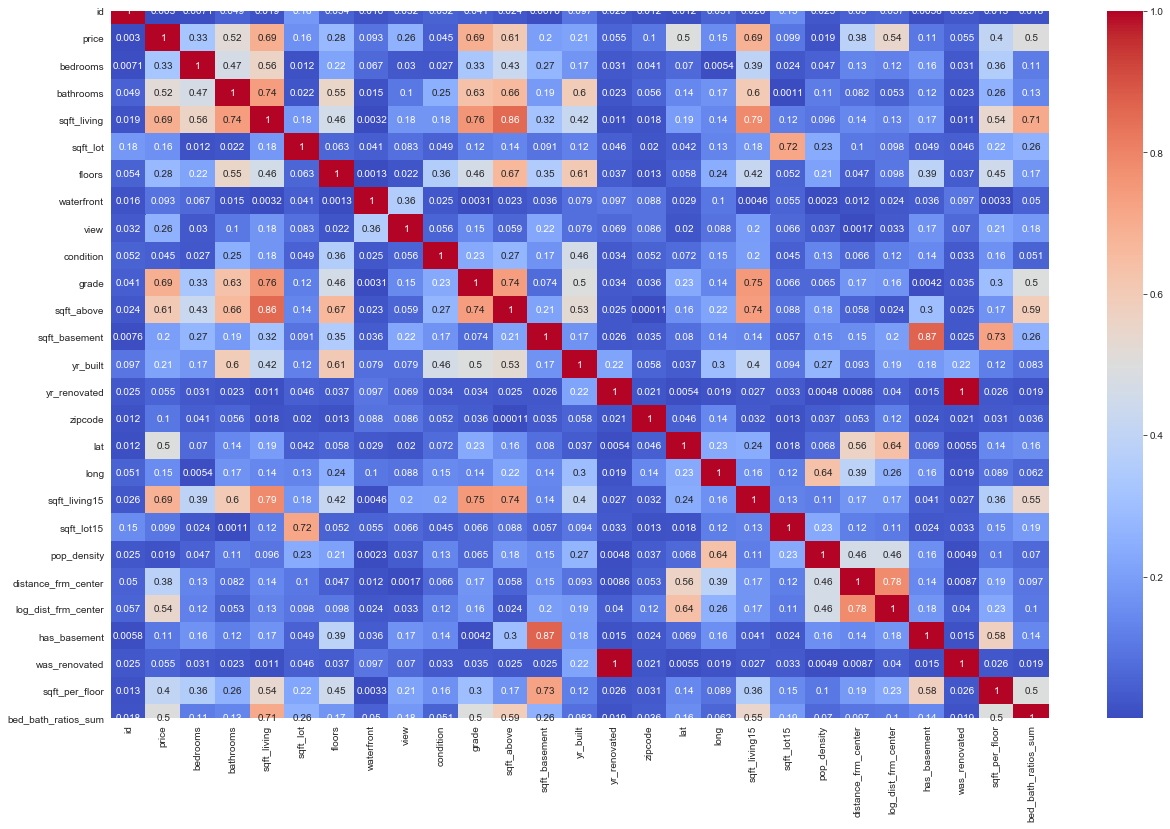

In [84]:
burbs_corr_df = abs(burbs.corr())
plt.figure(figsize=(21,13))
sns.heatmap(burbs_corr_df, cmap='coolwarm', annot=True)

In [85]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as scs

In [86]:
import FlatironProjectFunctions as ffs

In [87]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'pop_density',
       'distance_frm_center', 'log_dist_frm_center', 'has_basement',
       'was_renovated', 'sqft_per_floor', 'bed_bath_ratios_sum'],
      dtype='object')

In [20]:
vars_to_use = [ 'grade','was_renovated','has_basement','view','log_dist_frm_center','sqft_per_floor', 'pop_density']
    
    
target_var = 'price'
olsres = ffs.build_sm_ols(df=df, features_to_use=vars_to_use, target=target_var, add_constant=True)

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     5533.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:35:50   Log-Likelihood:            -2.7390e+05
No. Observations:               20557   AIC:                         5.478e+05
Df Residuals:                   20549   BIC:                         5.479e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.512e+05   8

In [21]:
ffs.check_vif_feature_space(df=df, features_to_use=vars_to_use, add_constant=True, show_summary=False)

True

In [22]:
ffs.check_model(df=df, features_to_use=vars_to_use, target_col=target_var,  add_constant=True,   show_summary=True, vif_threshold=3.0)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     5533.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:36:47   Log-Likelihood:            -2.7390e+05
No. Observations:               20557   AIC:                         5.478e+05
Df Residuals:                   20549   BIC:                         5.479e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.512e+05   8

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
ypred = olsres.predict()

In [24]:
resid = df['price'] - ypred
#df['resid'] = resid

In [ ]:
#to_consider_adding = ['resid','']
#corr_df_to_add = abs(df[to_consider_adding].corr())
#plt.figure(figsize=(21,13))
#sns.heatmap(corr_df_to_add, cmap='coolwarm', annot=True)

#This was used to add features, or to consider features to add. The idea is that if it correlates with the residuals,
# adding it to the model will then provide us with new information.

In [25]:
ffs.check_residuals_normal(olsres)

False

In [26]:
ffs.check_residuals_homoskedasticity(olsres)

False

In [27]:
olsres.model.exog
sms.het_breuschpagan(resid=resid, exog_het=olsres.model.exog)

(1535.9035060984131, 0.0, 237.03967071460633, 0.0)

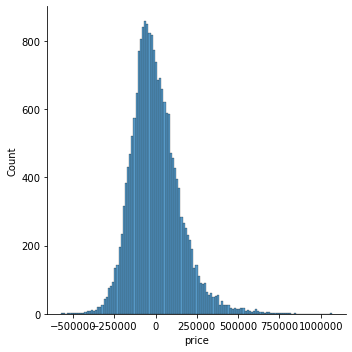

In [28]:
sns.displot(resid)
plt.show()

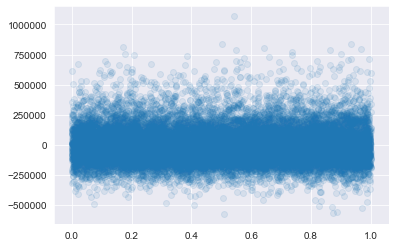

In [77]:
x_axis = np.linspace(0, 1, len(resid))

plt.scatter(x_axis, resid, alpha=0.1)
plt.show()

## When looking at our residuals in graph form, we do see that it does look like and follow trends of normal distributions. While it does present a slightly longer tail on the right side of the graph, we will assume that this is normal enough. since our N is large, we do get a warning that it may not be accurate due to the sheer size of our set. Our residuals also appear homoskedacitous. We will be moving forward with the assumptions that our models meet the criteria for OLS/Linear regression and assume that the tests in our code fail due to the sheer mass of our data

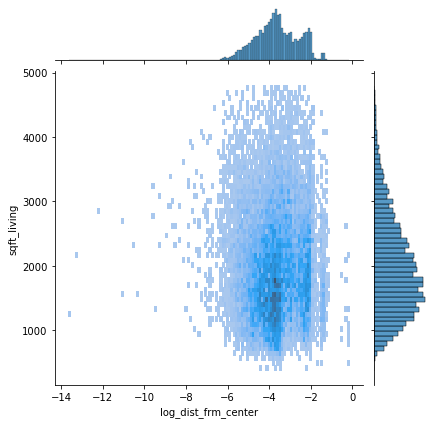

In [30]:
sns.jointplot(x='log_dist_frm_center', y='sqft_living', data=df, kind='hist')

In [88]:
ffs.check_model(df=burbs, features_to_use=vars_to_use, target_col=target_var,  add_constant=True,   show_summary=True, vif_threshold=3.0)

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     5151.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:24:11   Log-Likelihood:            -1.6520e+05
No. Observations:               12536   AIC:                         3.304e+05
Df Residuals:                   12528   BIC:                         3.305e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -8.46e+05   8

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
ffs.check_model(df=seattle_proper, features_to_use=vars_to_use, target_col=target_var,  add_constant=True,   show_summary=True, vif_threshold=3.0)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1711.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:37:23   Log-Likelihood:            -1.0739e+05
No. Observations:                8021   AIC:                         2.148e+05
Df Residuals:                    8013   BIC:                         2.148e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.815e+05   1

In [33]:
def show_residual_graphs(dataframe):
    df_ols = ffs.build_sm_ols(df=dataframe, features_to_use=vars_to_use, target=target_var, add_constant=True, show_summary=False)
    residuals = dataframe['price'] - df_ols.predict()
    fig, axs = plt.subplots(ncols=2, figsize=(15,8))
    plt.figure(figsize=(13,8))
    sns.histplot(residuals, ax=axs[0])
    x_ax = np.linspace(0, 1, len(residuals))

    sns.scatterplot(x=x_ax, y=residuals, alpha=0.1, ax=axs[1])
    
    plt.show()
    return None
    

In [34]:
city_ols = ffs.build_sm_ols(df=seattle_proper, features_to_use=vars_to_use, target=target_var, add_constant=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1711.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:37:32   Log-Likelihood:            -1.0739e+05
No. Observations:                8021   AIC:                         2.148e+05
Df Residuals:                    8013   BIC:                         2.148e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.815e+05   1

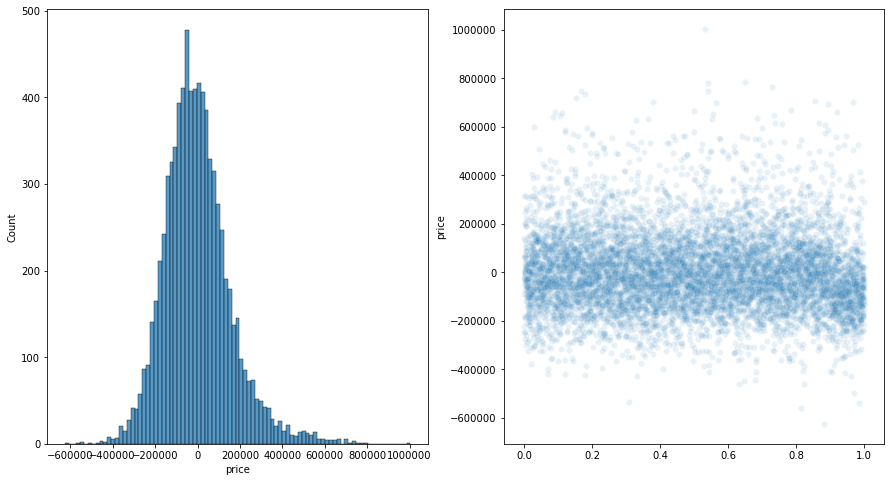

<Figure size 936x576 with 0 Axes>

In [35]:
show_residual_graphs(seattle_proper)

In [36]:
burbs_ols = ffs.build_sm_ols(df=burbs, features_to_use=vars_to_use, target=target_var, add_constant=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     5151.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:37:43   Log-Likelihood:            -1.6520e+05
No. Observations:               12536   AIC:                         3.304e+05
Df Residuals:                   12528   BIC:                         3.305e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -8.46e+05   8

C:\Users\Gustavo\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


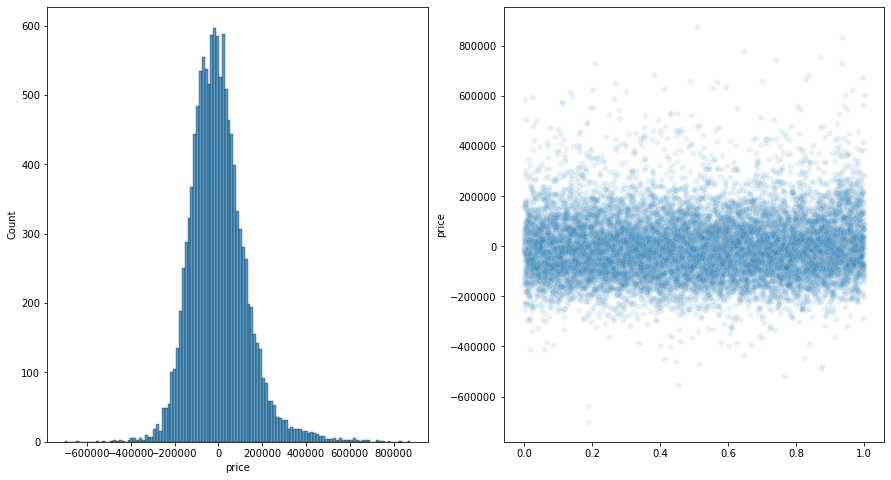

<Figure size 936x576 with 0 Axes>

In [37]:
show_residual_graphs(burbs)

## There is the graph of the residuals for each of the OLS models, as I have decided to do a separate one for the city and another for the suburbs both using the same set of features. In each model, the distribution of the residuals appears homoscedatic and of a normal distribution. Because the dataset is so large, and because of the shapes of our graphs above are the shape that they are, I am assuming that the models created are valid.

# Cross-validating in Sklearn

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

In [39]:
city_linear = LinearRegression(fit_intercept=True)
burbs_linear = LinearRegression(fit_intercept=True)

In [40]:
city_x = seattle_proper[vars_to_use]
city_y = seattle_proper[target_var]

burb_x = burbs[vars_to_use]
burb_y = burbs[target_var]

In [44]:
cross_val_score(city_linear, city_x, city_y, scoring="r2", n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.57450216, 0.60344657, 0.61728791, 0.61127918, 0.52930228])

In [45]:
cross_val_score(burbs_linear, burb_x, burb_y, scoring="r2", n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.75174434, 0.74984266, 0.72275437, 0.75047725, 0.72341799])

# Train-Test Splitting

In [46]:
cityx_train, cityx_test, cityy_train, cityy_test = train_test_split(city_x, city_y, test_size=0.15)

burbx_train, burbx_test, burby_train, burby_test = train_test_split(burb_x, burb_y, test_size=0.15)


In [47]:
city_linear.fit(cityx_train, cityy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
city_linear.coef_

array([ 1.35641892e+05,  6.96395986e+04,  2.10805298e+03,  6.11323219e+04,
       -5.26675768e+04,  9.34844805e+01,  2.00947149e+01])

In [49]:
city_linear.score(cityx_train, cityy_train), city_linear.score(cityx_test, cityy_test)

(0.5985876125400749, 0.6013749436203584)

### City looks good and will now test for the suburbs model

In [50]:
burbs_linear.fit(burbx_train, burby_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
burbs_linear.coef_

array([ 1.21257450e+05,  6.92063174e+04, -3.82910714e+04,  5.86736894e+04,
       -1.13783033e+05,  6.58304633e+01, -3.15852282e+01])

In [52]:
burbs_linear.score(burbx_train, burby_train), burbs_linear.score(burbx_test, burby_test)

(0.741409225838527, 0.7458342781803872)